In [104]:
import pandas as pd

from simulator import BettingSimulation, simulate_multiple_seasons
from plotting import (
    plot_probs_results_comparison, 
    plot_dss_results_comparison,
    plot_all_results_comparison,
    plot_cumulative_profit_comparison
)


In [105]:
# Simulate seasons with estimation error
final_profits_true, final_profits_estimated, final_profits_random, all_results = simulate_multiple_seasons(
    num_seasons=1000,
    num_games=82,
    estimation_error=0.5,  # Adjust this value to simulate estimation error
    limited_estimates=False,  # Set to True if you want to use limited estimates
)



In [106]:
data = pd.read_csv('./data/final_profits_comparison.csv')
final_profits_true = data['True Probabilities']
final_profits_estimated = data['Estimated Probabilities']
final_profits_random = data['Random Betting']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using True Probabilities - Worst-case final profit: $160.00
Using True Probabilities - Best-case final profit: $1660.00
Using Estimated Probabilities - Worst-case final profit: $-220.00
Using Estimated Probabilities - Best-case final profit: $1440.00


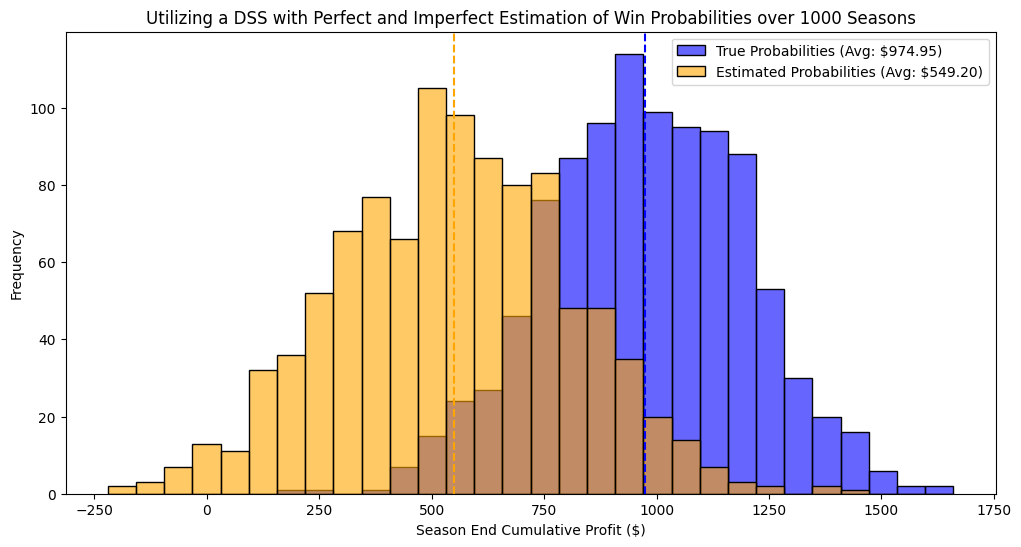

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using True Probabilities - Worst-case final profit: $160.00
Using True Probabilities - Best-case final profit: $1660.00
Using Estimated Probabilities - Worst-case final profit: $-771.00
Using Estimated Probabilities - Best-case final profit: $827.00


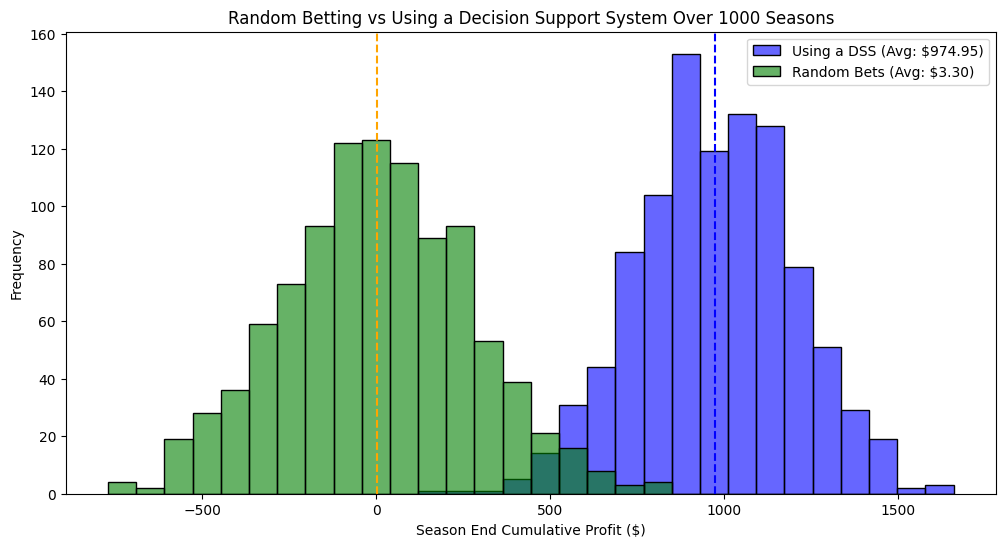

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using True Probabilities - Worst-case final profit: $160.00
Using True Probabilities - Best-case final profit: $1660.00
Using Estimated Probabilities - Worst-case final profit: $-220.00
Using Estimated Probabilities - Best-case final profit: $1440.00
Using Random Bets - Worst-case final profit: $-771.00
Using Random Bets - Best-case final profit: $827.00


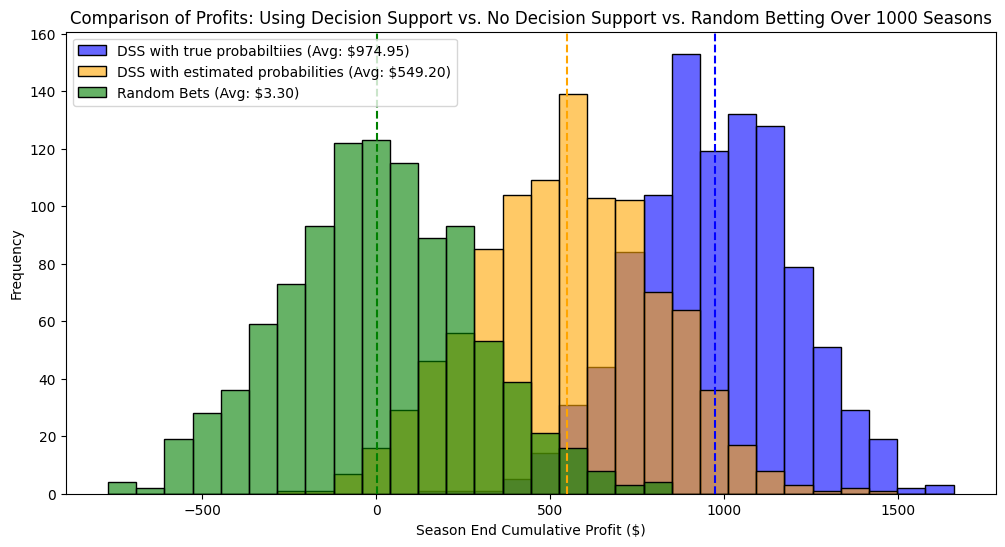

In [107]:
# Generate comparison plots


plot_probs_results_comparison(final_profits_true, final_profits_estimated, savefig=True)
plot_dss_results_comparison(final_profits_true, final_profits_random, savefig=True)
plot_all_results_comparison(final_profits_true, final_profits_estimated, final_profits_random, savefig=True)

In [108]:
# Combine final profits true and estimated into a dataframe
results_df = pd.DataFrame({
    'True Probabilities': final_profits_true,
    'Estimated Probabilities': final_profits_estimated,
    'Random Betting': final_profits_random
})

# Save the dataframe to a CSV file
csv_filename = 'final_profits_comparison.csv'
results_df.to_csv(f"./data/{csv_filename}", index=False)

print(f"Results saved to {csv_filename}")


Results saved to final_profits_comparison.csv


In [109]:
# This code searches for instances where, at game 20, the cumulative profit from random betting is greater 
# than the cumulative profit from betting with true probabilities. Use it in the plotting function below.
game = 30
example_seasons = []
for season in range(1000):
    if all_results[season].loc[game, 'Cumulative Profit ($) - Random'] > all_results[season].loc[game, 'Cumulative Profit ($) - True Probabilities']:
        print(season)
        example_seasons.append(season)

281
534
584
735
824
858


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


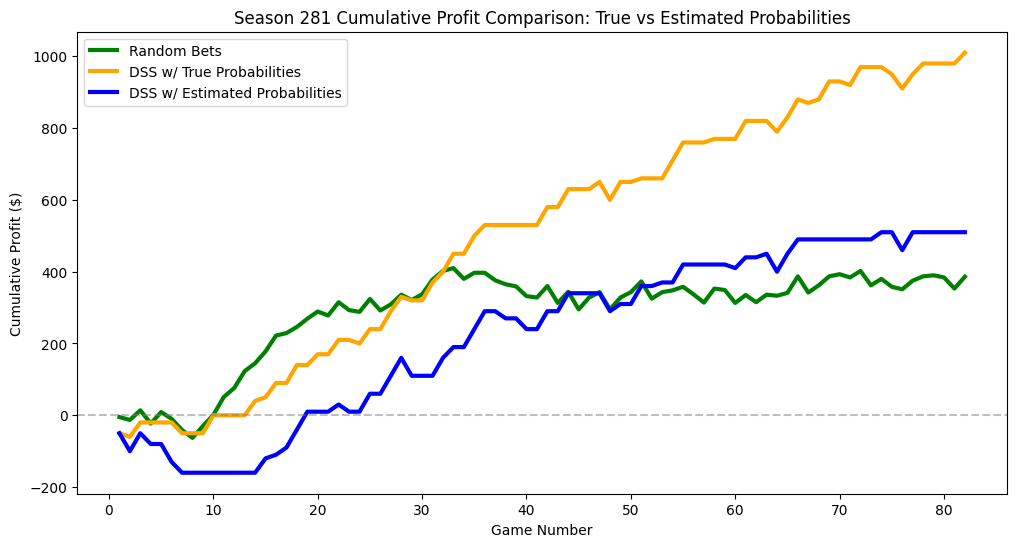

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


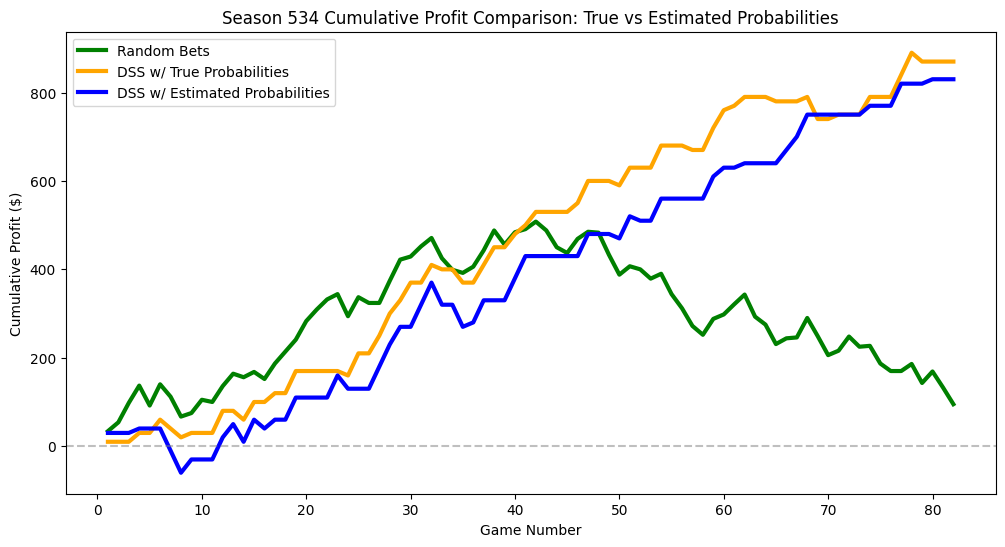

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


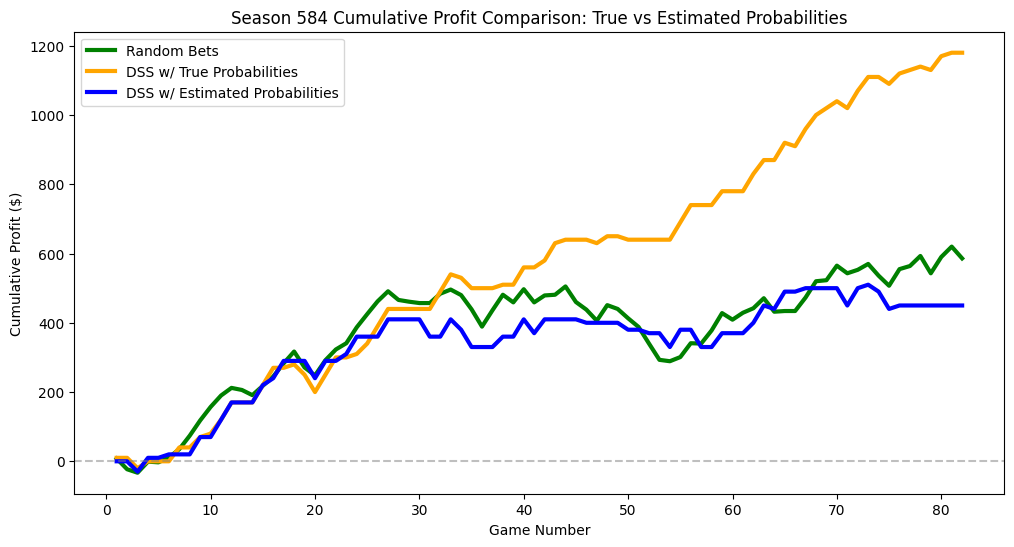

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


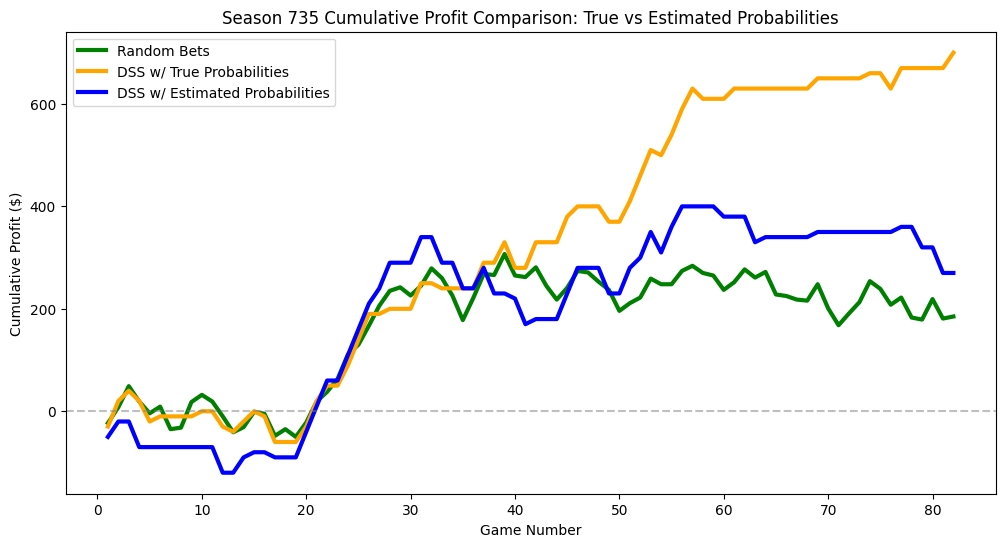

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


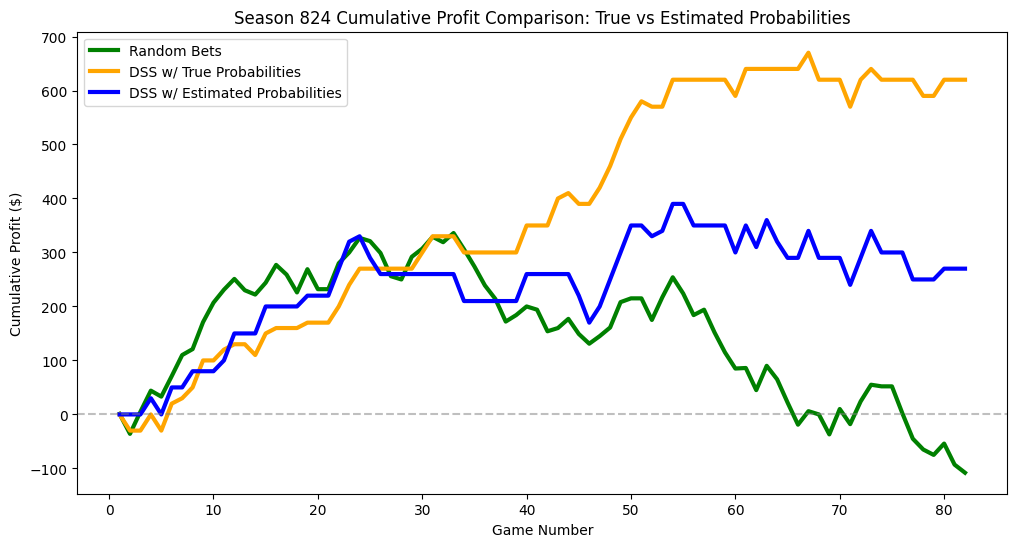

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


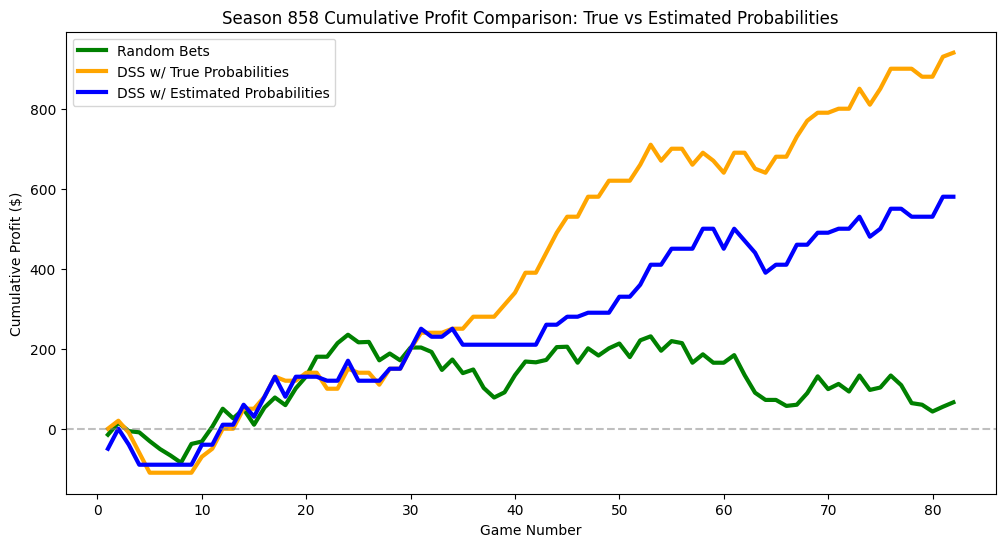

In [110]:
for season in example_seasons:
    columns = all_results[season].columns
    experiment1_cols = ["Opponent", "True Probability (%)", "Bet Amount ($) - Random", "Game Outcome", "Profit ($) - True Probabilities",  "Cumulative Profit ($) - Random"]
    experiment2_cols = ["Opponent", "True Probability (%)", "Bet Amount ($) - True Probabilities", "Game Outcome", "Profit ($) - True Probabilities",  "Cumulative Profit ($) - True Probabilities"]
    experiment3_cols = ["Opponent", "True Probability (%)", "Estimated Probability (%)", "Bet Amount ($) - Estimated Probabilities", "Game Outcome", "Profit ($) - Estimated Probabilities",  "Cumulative Profit ($) - Estimated Probabilities"]

    experiment1_names = ["Opponent", "True Probability (%)", "Bet Amount ($)", "Game Outcome", "Profit ($)",  "Cumulative Profit ($)"]
    experiment2_names = ["Opponent", "True Probability (%)", "Bet Amount ($)", "Game Outcome", "Profit ($)",  "Cumulative Profit ($)"]
    experiment3_names = ["Opponent", "True Probability (%)", "Estimated Probability (%)", "Bet Amount ($)", "Game Outcome", "Profit ($)",  "Cumulative Profit ($)"]


    exp1 = all_results[season][experiment1_cols].rename(columns=dict(zip(experiment1_cols, experiment1_names)))
    exp1.to_csv('./data/experiment1.csv', index=True)

    exp2 = all_results[season][experiment2_cols].rename(columns=dict(zip(experiment2_cols, experiment2_names)))
    exp2.to_csv('./data/experiment2.csv', index=True)

    exp3 = all_results[season][experiment3_cols].rename(columns=dict(zip(experiment3_cols, experiment3_names)))
    exp3.to_csv('./data/experiment3.csv', index=True)

    plot_cumulative_profit_comparison(exp1, exp2, exp3, season = season, savefig=True)